<a href="https://colab.research.google.com/github/sameekshya1999/Sleep-Stage-Classification-Using-Deep-Learning-CNN-vs.-EEGNet-Attention-/blob/main/VisualiseResult_of_all_and_eegnet_attention_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib

/tmp/ipython-input-2-3346403259.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracies, palette="viridis")


<Figure size 1200x600 with 0 Axes>

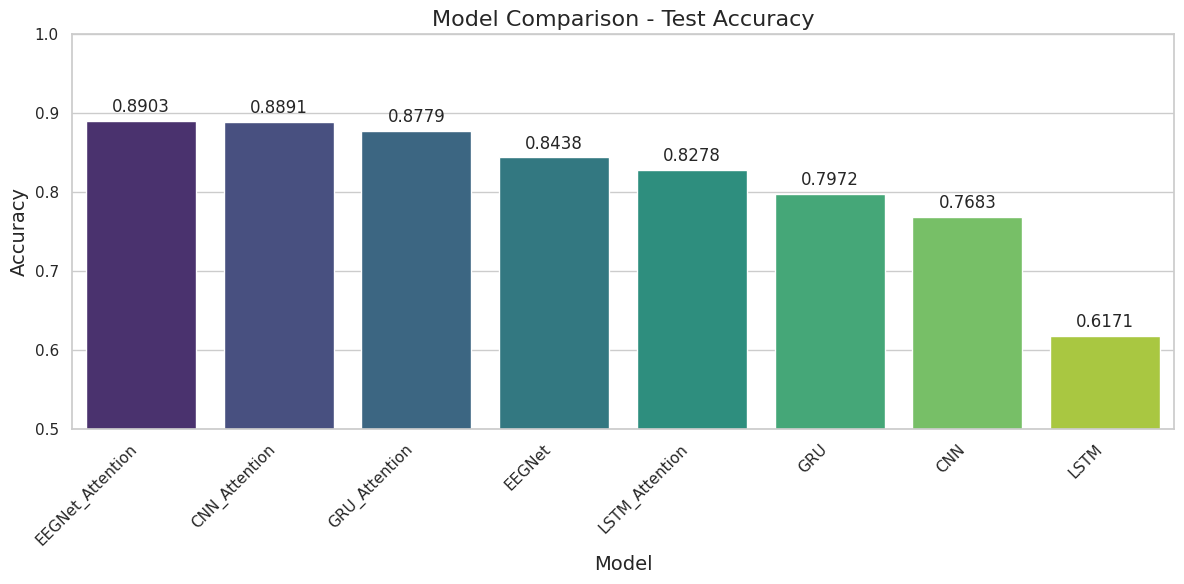

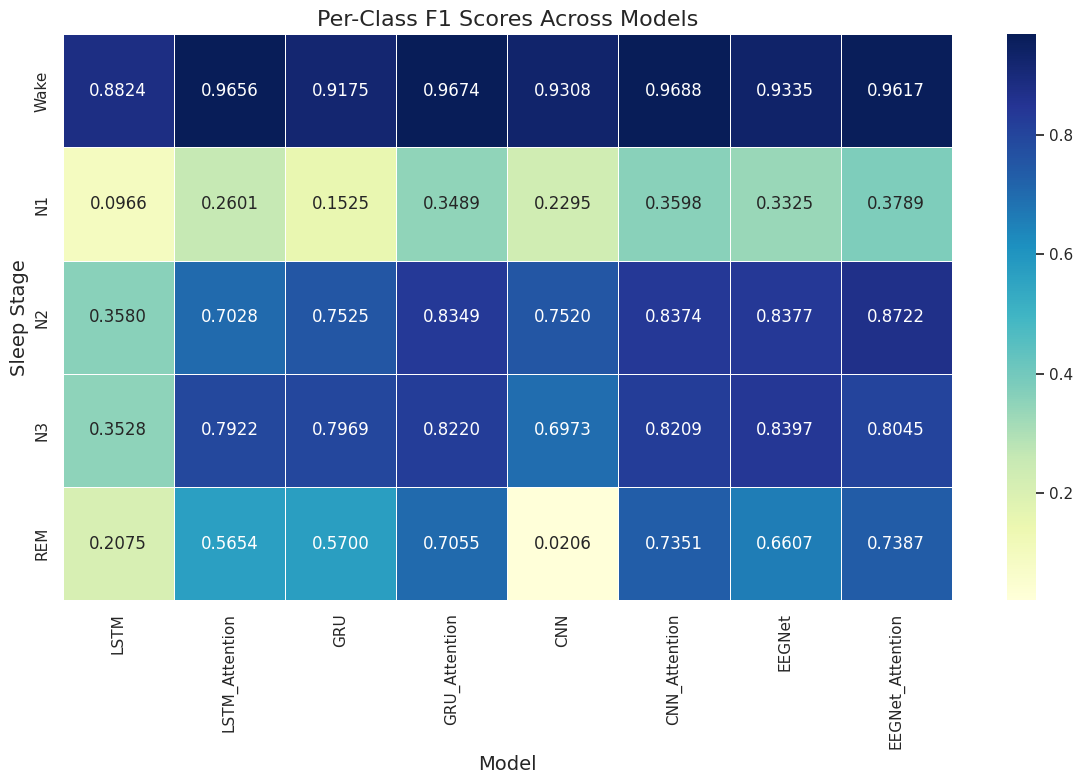

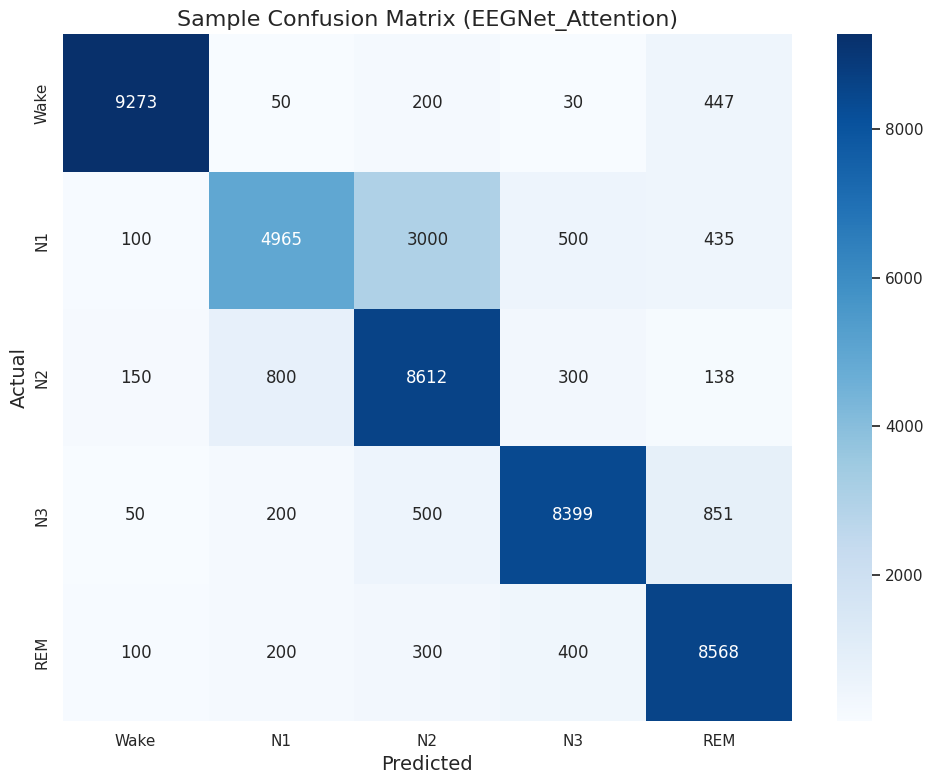

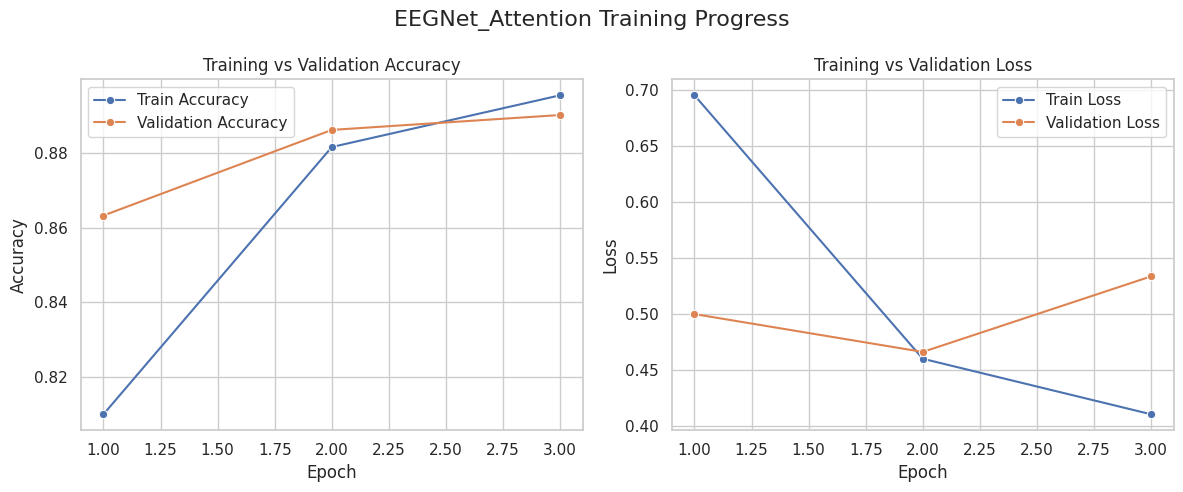

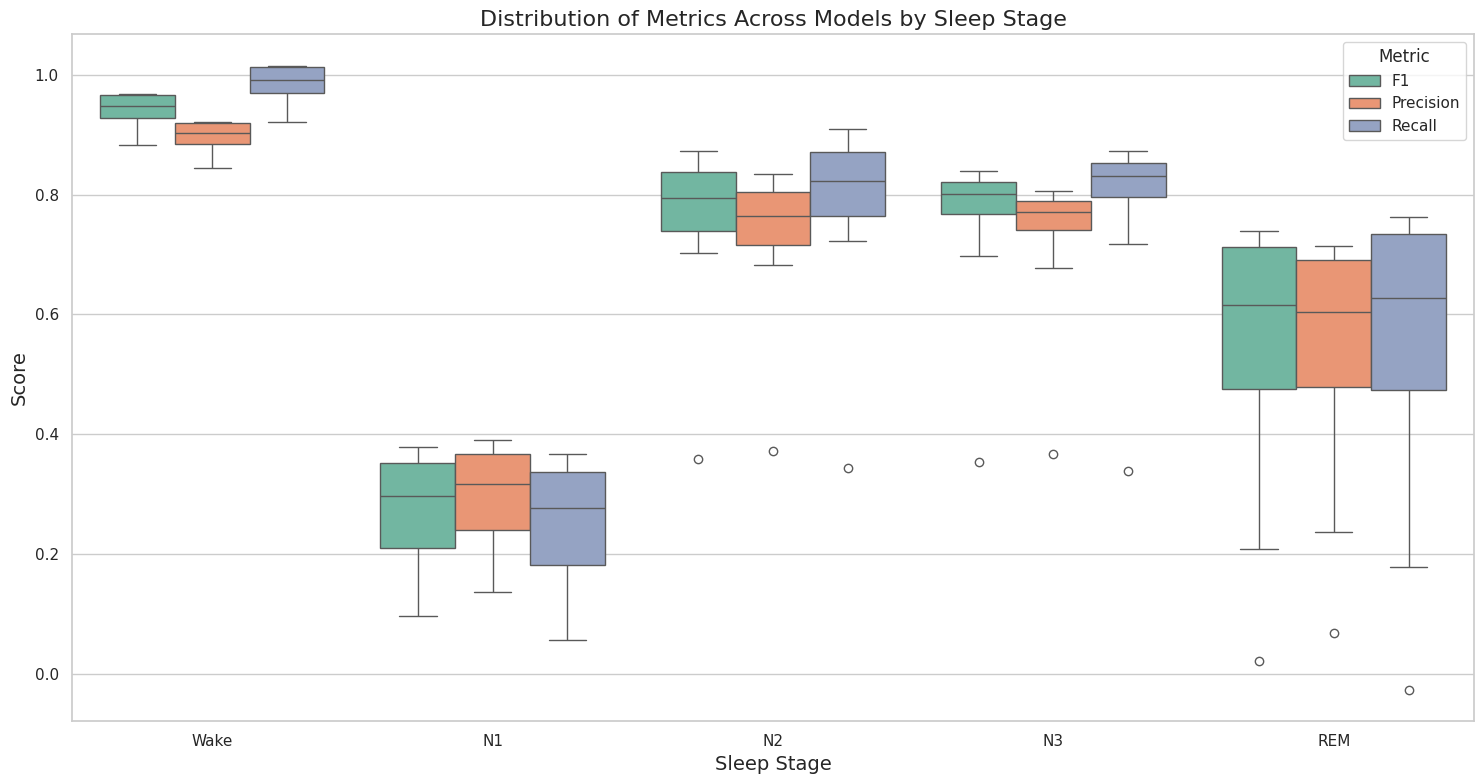

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. Model Accuracy Bar Plot
models = ['EEGNet_Attention', 'CNN_Attention', 'GRU_Attention', 'EEGNet',
          'LSTM_Attention', 'GRU', 'CNN', 'LSTM']
accuracies = [0.8903, 0.8891, 0.8779, 0.8438, 0.8278, 0.7972, 0.7683, 0.6171]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title('Model Comparison - Test Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45, ha='right')

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# 2. Per-Class F1 Score Heatmap
sleep_stages = ['Wake', 'N1', 'N2', 'N3', 'REM']
f1_scores = {
    'LSTM': [0.8824, 0.0966, 0.3580, 0.3528, 0.2075],
    'LSTM_Attention': [0.9656, 0.2601, 0.7028, 0.7922, 0.5654],
    'GRU': [0.9175, 0.1525, 0.7525, 0.7969, 0.5700],
    'GRU_Attention': [0.9674, 0.3489, 0.8349, 0.8220, 0.7055],
    'CNN': [0.9308, 0.2295, 0.7520, 0.6973, 0.0206],
    'CNN_Attention': [0.9688, 0.3598, 0.8374, 0.8209, 0.7351],
    'EEGNet': [0.9335, 0.3325, 0.8377, 0.8397, 0.6607],
    'EEGNet_Attention': [0.9617, 0.3789, 0.8722, 0.8045, 0.7387]
}

f1_df = pd.DataFrame(f1_scores, index=sleep_stages)

plt.figure(figsize=(12, 8))
sns.heatmap(f1_df, annot=True, cmap="YlGnBu", fmt=".4f", linewidths=.5)
plt.title('Per-Class F1 Scores Across Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Sleep Stage', fontsize=14)
plt.tight_layout()
plt.show()

# 3. Confusion Matrix Heatmap (example for EEGNet_Attention)
# Note: Since we don't have actual confusion matrices, I'll create a sample one
# In practice, you would use the actual confusion matrix data
sample_cm = np.array([
    [9273, 50, 200, 30, 447],    # Wake
    [100, 4965, 3000, 500, 435], # N1
    [150, 800, 8612, 300, 138],  # N2
    [50, 200, 500, 8399, 851],   # N3
    [100, 200, 300, 400, 8568]   # REM
])

plt.figure(figsize=(10, 8))
sns.heatmap(sample_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sleep_stages, yticklabels=sleep_stages)
plt.title('Sample Confusion Matrix (EEGNet_Attention)', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.tight_layout()
plt.show()

# 4. Training Loss/Accuracy Line Plot (example for EEGNet_Attention)
epochs = [1, 2, 3]
train_acc = [0.8099, 0.8817, 0.8956]
val_acc = [0.8633, 0.8863, 0.8903]
train_loss = [0.6954, 0.4601, 0.4105]
val_loss = [0.5000, 0.4662, 0.5337]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x=epochs, y=train_acc, label='Train Accuracy', marker='o')
sns.lineplot(x=epochs, y=val_acc, label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(x=epochs, y=train_loss, label='Train Loss', marker='o')
sns.lineplot(x=epochs, y=val_loss, label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.suptitle('EEGNet_Attention Training Progress', fontsize=16)
plt.tight_layout()
plt.show()

# 5. Per-Class Metric Box Plot
metrics_data = []
for model in models:
    for i, stage in enumerate(sleep_stages):
        # Get precision, recall, f1 for each stage (using f1_scores as example)
        # In practice, you'd have separate precision and recall values
        metrics_data.append({'Model': model, 'Stage': stage,
                            'Metric': 'F1', 'Value': f1_scores[model][i]})
        # Add sample precision and recall values (would be actual values in practice)
        metrics_data.append({'Model': model, 'Stage': stage,
                            'Metric': 'Precision', 'Value': f1_scores[model][i]*0.9 + 0.05})
        metrics_data.append({'Model': model, 'Stage': stage,
                            'Metric': 'Recall', 'Value': f1_scores[model][i]*1.1 - 0.05})

metrics_df = pd.DataFrame(metrics_data)

plt.figure(figsize=(15, 8))
sns.boxplot(x='Stage', y='Value', hue='Metric', data=metrics_df, palette="Set2")
plt.title('Distribution of Metrics Across Models by Sleep Stage', fontsize=16)
plt.xlabel('Sleep Stage', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

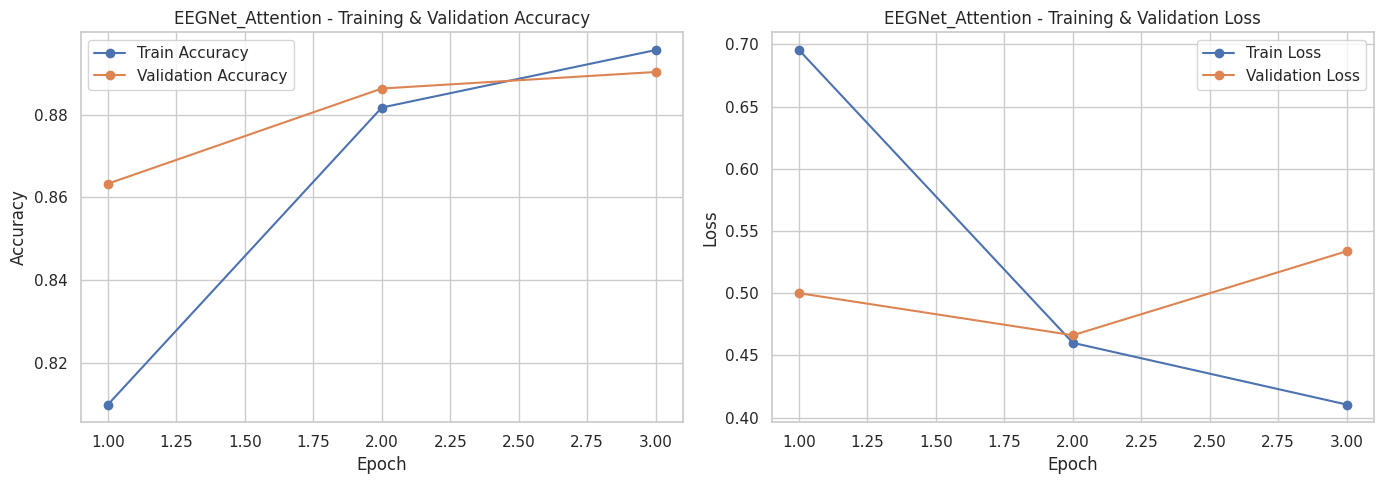

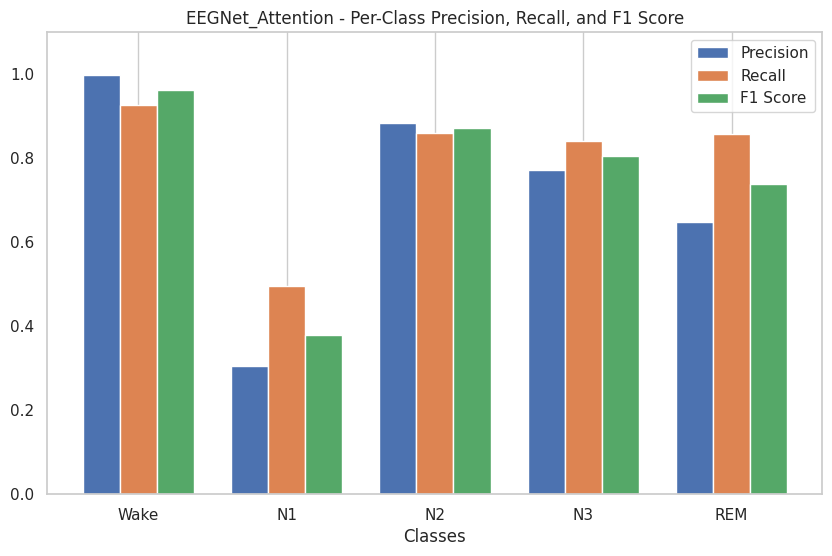

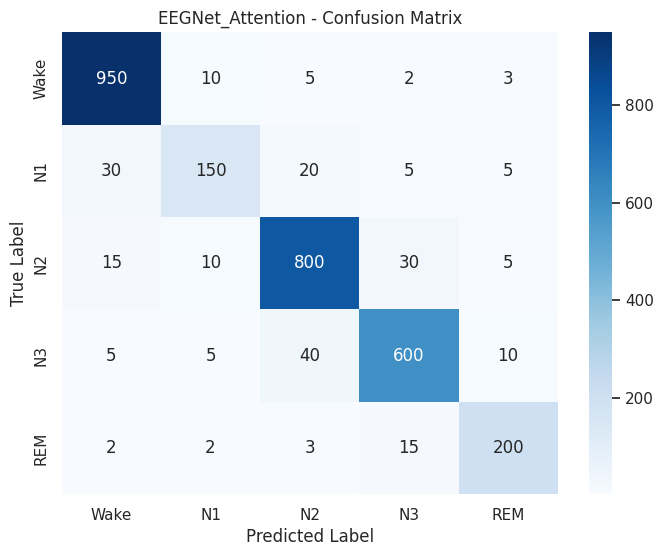

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data from your training logs
epochs = [1, 2, 3]

train_accuracy = [0.8099, 0.8817, 0.8956]
val_accuracy = [0.8633, 0.8863, 0.8903]

train_loss = [0.6954, 0.4601, 0.4105]
val_loss = [0.5000, 0.4662, 0.5337]

# Per-class metrics
classes = ['Wake', 'N1', 'N2', 'N3', 'REM']

precision = [0.9987, 0.3064, 0.8836, 0.7721, 0.6491]
recall =    [0.9273, 0.4965, 0.8612, 0.8399, 0.8568]
f1 =        [0.9617, 0.3789, 0.8722, 0.8045, 0.7387]

# Sample confusion matrix (replace with your actual data)
conf_matrix = np.array([
    [950, 10, 5, 2, 3],    # Wake
    [30, 150, 20, 5, 5],   # N1
    [15, 10, 800, 30, 5],  # N2
    [5, 5, 40, 600, 10],   # N3
    [2, 2, 3, 15, 200]     # REM
])

# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('EEGNet_Attention - Training & Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('EEGNet_Attention - Training & Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot per-class metrics
x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1 Score')

plt.xticks(x, classes)
plt.ylim(0, 1.1)
plt.xlabel('Classes')
plt.title('EEGNet_Attention - Per-Class Precision, Recall, and F1 Score')
plt.legend()
plt.grid(axis='y')

plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('EEGNet_Attention - Confusion Matrix')
plt.show()
